Installing libraries... please wait.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 45.6 MB/s eta 0:00:00


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


✅ GPU detected! Initializing generative model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!



Generating 5 synthetic samples...
Generating Image 1: A futuristic cyberpunk city with neon lights and flying cars, digital art


  0%|          | 0/50 [00:00<?, ?it/s]

Generating Image 2: A serene oil painting of a mountain lake at sunrise, highly detailed


  0%|          | 0/50 [00:00<?, ?it/s]

Generating Image 3: A high-tech robot gardening in a lush green backyard, 4k resolution


  0%|          | 0/50 [00:00<?, ?it/s]

Generating Image 4: An astronaut riding a horse on the surface of Mars, cinematic lighting


  0%|          | 0/50 [00:00<?, ?it/s]

Generating Image 5: A magical underwater kingdom with glowing coral reefs, 3D render


  0%|          | 0/50 [00:00<?, ?it/s]


--- SYNTHETIC DATASET SAMPLES ---


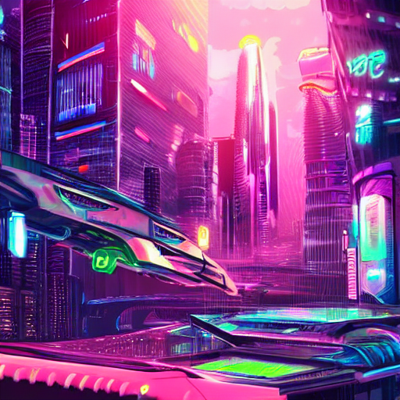

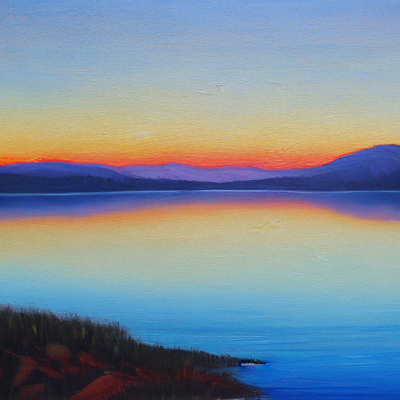

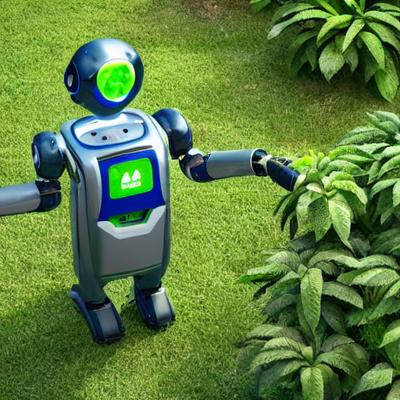

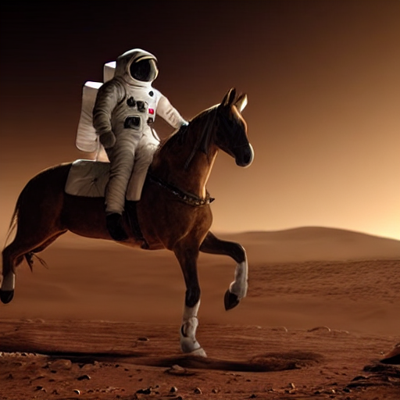

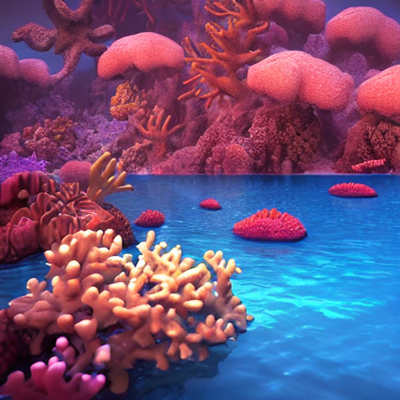


Success! All synthetic images are saved in the folder: synthetic_data_samples


In [ ]:
# =================================================================
# LAB - 1: SYNTHETIC DATA GENERATION (STABLE DIFFUSION)
# Implementation: Text-to-Image Synthesis
# =================================================================

# --- 1. INSTALL LIBRARIES ---
# We need 'diffusers' for the model and 'accelerate' for GPU efficiency
print("Installing libraries... please wait.")
!pip install --upgrade diffusers transformers accelerate -q

import torch
from diffusers import StableDiffusionPipeline
import os
from IPython.display import display

# --- 2. GPU VALIDATION ---
# This block checks if you have successfully switched to a GPU runtime
if not torch.cuda.is_available():
    print("❌ ERROR: GPU not detected!")
    print("FIX: Go to Runtime > Change runtime type > Select 'T4 GPU' > Save.")
else:
    print("✅ GPU detected! Initializing generative model...")

    # --- 3. MODEL SETUP ---
    # Selection: Stable Diffusion v1.5 (Pre-trained Generative Model)
    model_id = "runwayml/stable-diffusion-v1-5"

    # Load the pipeline in float16 precision to save memory
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda") # Move model to GPU memory

    # Create folder for the synthetic dataset
    output_dir = "synthetic_data_samples"
    os.makedirs(output_dir, exist_ok=True)

    # --- 4. INPUT PROMPTS ---
    # Defining 5 prompts to generate a variety of synthetic samples
    prompts = [
        "A futuristic cyberpunk city with neon lights and flying cars, digital art",
        "A serene oil painting of a mountain lake at sunrise, highly detailed",
        "A high-tech robot gardening in a lush green backyard, 4k resolution",
        "An astronaut riding a horse on the surface of Mars, cinematic lighting",
        "A magical underwater kingdom with glowing coral reefs, 3D render"
    ]

    # --- 5. DATA GENERATION & STORAGE ---
    generated_images = []
    print(f"\nGenerating {len(prompts)} synthetic samples...")

    for i, prompt in enumerate(prompts):
        print(f"Generating Image {i+1}: {prompt}")

        # The 'pipe' generates the image from the text prompt
        image = pipe(prompt).images[0]

        # Save output in dataset format (folder)
        file_path = os.path.join(output_dir, f"synthetic_sample_{i+1}.png")
        image.save(file_path)
        generated_images.append(image)

    # --- 6. DISPLAY SAMPLE OUTPUTS ---
    print("\n--- SYNTHETIC DATASET SAMPLES ---")
    for img in generated_images:
        display(img.resize((400, 400))) # Resize for neat display in Colab

    print(f"\nSuccess! All synthetic images are saved in the folder: {output_dir}")